# Zomato Data Analysis

## Problem Statement
#### Analysis Zomato Restaurant dataset to find the more insights about the Restaurant business.

## Data Description:

#### url : contains the url of the restaurant in the zomato website

#### address : contains the address of the restaurant in Bengaluru

#### name : contains the name of the restaurant

#### online_order : whether online ordering is available in the restaurant or not

#### book_table : table book option available or not

#### rate : contains the overall rating of the restaurant out of 5

#### votes : contains total number of rating for the restaurant as of the above mentioned date

#### phone : contains the phone number of the restaurant

#### location : contains the neighborhood in which the restaurant is located

#### rest_type : restaurant type

#### dish_liked : dishes people liked in the restaurant

#### cuisines : food styles, separated by comma

#### approx_cost(for two people) : contains the approximate cost for meal for two people

#### reviews_list : list of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by the customer

#### menu_item : contains list of menus available in the restaurant

#### listed_in(type) : type of meal

#### listed_in(city) : contains the neighborhood in which the restaurant is listed

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
# Import data and view it

data = pd.read_csv("zomato.csv")
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

### Above deatils tells us,

#### * there are total 51717 records and 17 columns.
#### * Columns - rate, phone, location, rest_type, dish_liked, cuisines, approx_cost(for two people) contains null values.
#### * dish_liked column contains maximum null values. On the otherhand, location column contains minimum null values.
#### * Only one column(votes) is quantitative data and remaning all are qualitative data

## Descriptive Analysis

In [4]:
# Measure of Central tendency of quantitative data

data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


##### * Max and Min represents range - 16832, 0
##### * Std represents standard deviation - 803.8
##### * 50% is the median - 41.0

In [5]:
# Varience 

data['votes'].var()

646156.901605184

In [6]:
# Common values

data['votes'].mode()

0    0
dtype: int64

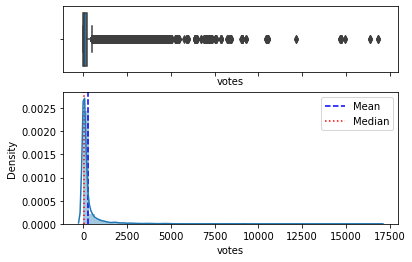

In [7]:
# Visualization of Central tendency of quantitative data

f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios' : (0.5, 1)})

mean = data['votes'].mean()
median = data['votes'].median()

plt.axvline(mean, color = 'b', linestyle = '--')
plt.axvline(median, color = 'r', linestyle = ':')
plt.legend({'Mean' : mean, "Median" : median})

sns.boxplot(data['votes'], ax = ax_box)
sns.distplot(data['votes'], ax= ax_hist)

ax_box.xlable = ' '
plt.show()

#### * Above visualization represents maximum level of outliers 
#### * Mean and median has little variation
#### * By above plot, we can say it the skewness is > 0 and more weight in the left tail of the distribution.
#### * Votes data is positively skewed

In [8]:
data['votes'].skew()

7.547819350060049

In [9]:
data.isna().sum() * 100 / data.index.size

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

## Exploratory Data Analysis

In [10]:
# Let's see all the items in the menu

data['menu_item'].unique()

array(['[]',
       "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'Chees

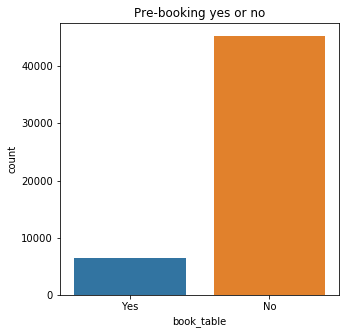

In [11]:
# How many resturants provide pre-booking 

sns.countplot(data['book_table'])
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title("Pre-booking yes or no")
plt.show()

#### * So among 51717 resturants in banglore those tied up with zomato, only around 8k resturants allow pre-booking 

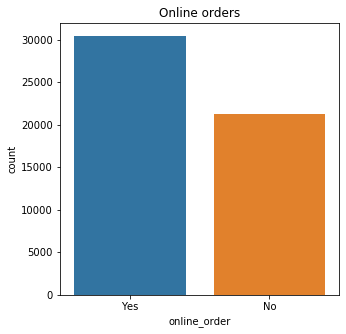

In [12]:
# How many resturants accepts online oders

sns.countplot(data['online_order'])
fig = plt.gcf()
fig.set_size_inches(5, 5)
plt.title("Online orders")
plt.show()

#### * Among 51717 resturants in banglore those tied up with zomato, around 30k resturants accepts online orders

In [13]:
# Types of resturants present

data['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

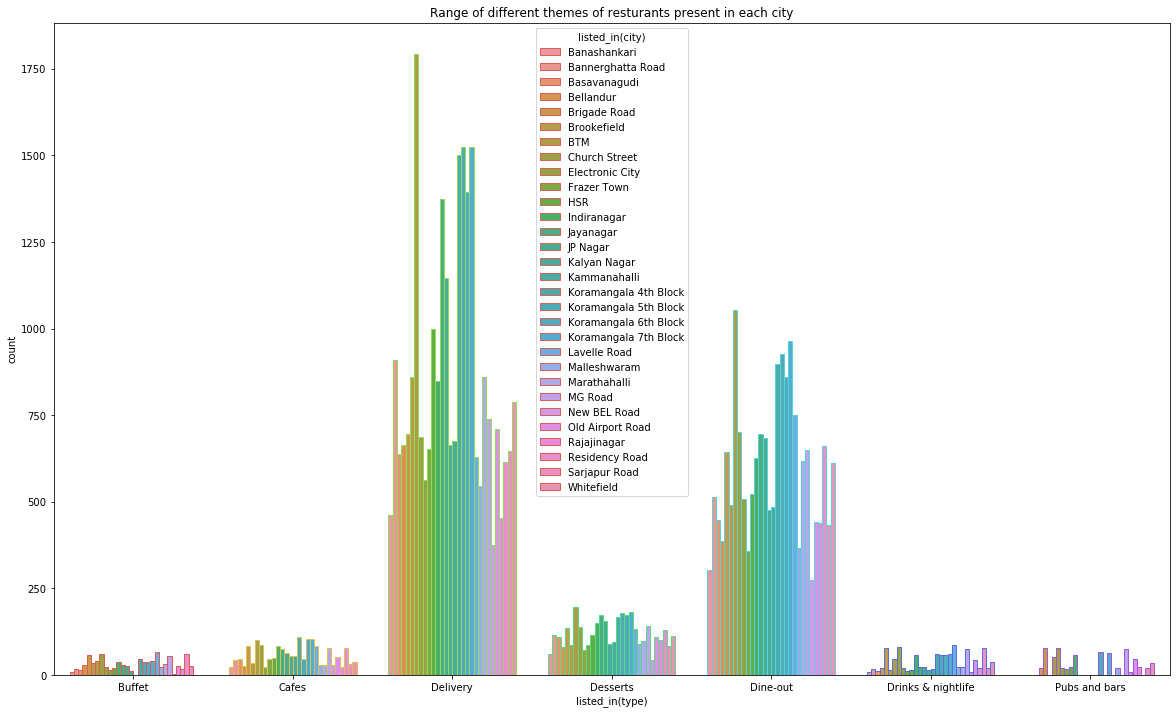

In [14]:
sns.countplot(data['listed_in(type)'], hue = 'listed_in(city)', data = data, edgecolor = sns.color_palette('hls', 8))
fig = plt.gcf()
fig.set_size_inches(20, 12)
plt.title("Range of different themes of resturants present in each city")
plt.show()

#### * Above plot, represents BTM city has more resturants with delivery service
#### * Pubs and bars are very less and few cities don't have any.
#### * Kammanahalli and Old Airport Road don't have any resturant with buffet system
#### * BTM have more desserts resturants and New BEL road has less
#### * BTM has more Dine-out resturants and good number of Cafes comparitively
#### * New BEl Road has less number of resturants that delivers food
#### * Brigade Road, Church Street and Lavelle Road are the top three cities with more number of Drinks & nightlife resturants comparitively.
#### * Bellandur, BTM and MG Road has good number of Pubs and bars.

In [15]:
# Restutant types

data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [16]:
# how many resturant types we have

data['rest_type'].nunique()

93

Text(0.5, 1.0, 'Top resturants in Benglure')

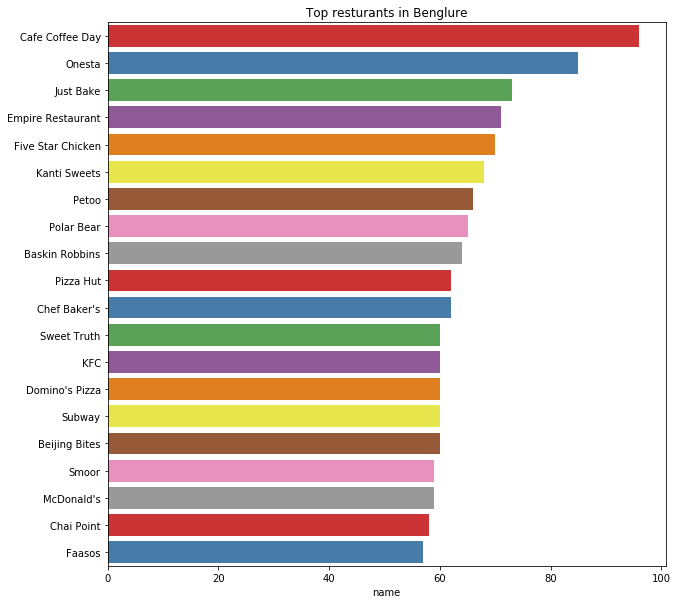

In [17]:
# Top 20 Resturants

col = data['name'].value_counts()[: 20]
sns.barplot(x = col, y = col.index, palette = 'Set1')
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.title("Top resturants in Benglure")

## Data Cleaning

In [18]:
print(data.rate.nunique())
data['rate'].unique()

64


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

#### * All are string values
#### * nan and New values need to be removed

In [19]:
data.rate = data.rate.replace('NEW', np.nan)
data.dropna(how = 'any', inplace = True)
print(data['rate'].nunique())
data.rate.unique()

62


array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [20]:
data['rate'] = data.rate.astype('str')
data['rate'] = data['rate'].apply(lambda x : x.replace('/5', ''))
data['rate'] = data['rate'].apply(lambda x : float(x))
data.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)     object
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

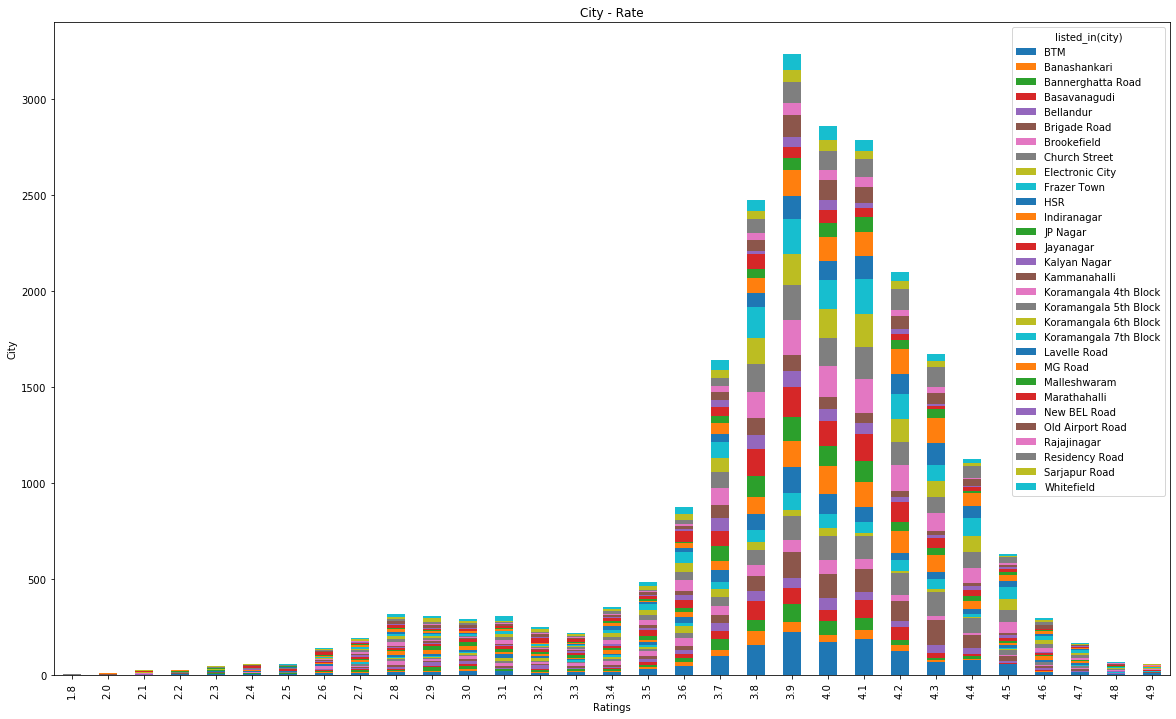

In [23]:
# Relation between city and ratings

rel = pd.crosstab(data['rate'], data['listed_in(city)'])
rel.plot(kind = 'bar', stacked = True, figsize = (20, 12))
plt.title("City - Rate", fontsize = 12)
plt.xlabel("Ratings", fontsize = 10)
plt.ylabel("City", fontsize = 10)
plt.show()

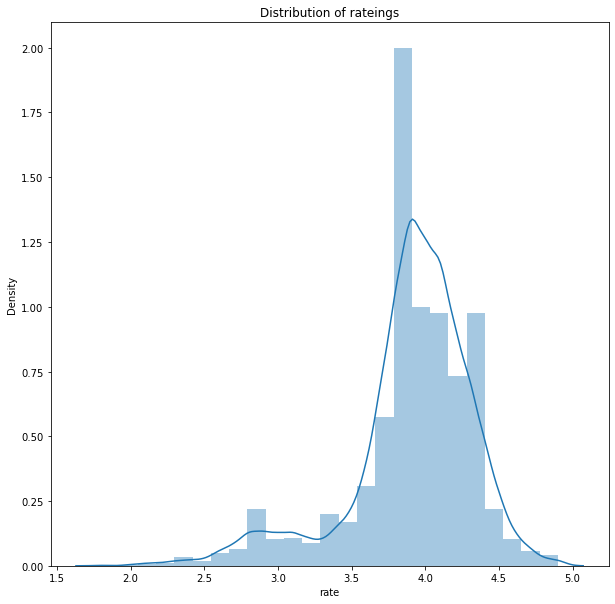

In [24]:
plt.figure(figsize = (10, 10))
sns.distplot(data['rate'], bins = 25)
plt.title("Distribution of rateings")
plt.show()

#### * 3.9 is the common rating obtained by most number of resturants

## Building the model

#### * We almost have categorical data, hence performing one hot encoding

In [25]:
data.online_order.replace(('Yes', 'No'), (True, False), inplace = True)
data.book_table.replace(('Yes', 'No'), (True, False), inplace = True)
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [26]:
# Encoding by creating encode function

def Encode(data):
    for column in data.columns[~data.columns.isin(['rate', 'approx_cost(for two people)', 'votes'])]:
        data[column] = data[column].factorize()[0]
    return data
data = Encode(data)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23046 entries, 0 to 51715
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          23046 non-null  int64  
 1   address                      23046 non-null  int64  
 2   name                         23046 non-null  int64  
 3   online_order                 23046 non-null  int64  
 4   book_table                   23046 non-null  int64  
 5   rate                         23046 non-null  float64
 6   votes                        23046 non-null  int64  
 7   phone                        23046 non-null  int64  
 8   location                     23046 non-null  int64  
 9   rest_type                    23046 non-null  int64  
 10  dish_liked                   23046 non-null  int64  
 11  cuisines                     23046 non-null  int64  
 12  approx_cost(for two people)  23046 non-null  object 
 13  reviews_list    

In [28]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,0,0,0,0,4.1,775,0,0,0,0,0,800,0,0,0,0
1,1,1,1,0,1,4.1,787,1,0,0,1,1,800,1,0,0,0
2,2,2,2,0,1,3.8,918,2,0,1,2,2,800,2,0,0,0
3,3,3,3,1,1,3.7,88,3,0,2,3,3,300,3,0,0,0
4,4,4,4,1,1,3.8,166,4,1,0,4,4,600,4,0,0,0


In [29]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].astype(str)
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].apply(lambda x : x.replace(',', ''))
data['approx_cost(for two people)'] = data['approx_cost(for two people)']. apply(lambda x : int(x))

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23046 entries, 0 to 51715
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          23046 non-null  int64  
 1   address                      23046 non-null  int64  
 2   name                         23046 non-null  int64  
 3   online_order                 23046 non-null  int64  
 4   book_table                   23046 non-null  int64  
 5   rate                         23046 non-null  float64
 6   votes                        23046 non-null  int64  
 7   phone                        23046 non-null  int64  
 8   location                     23046 non-null  int64  
 9   rest_type                    23046 non-null  int64  
 10  dish_liked                   23046 non-null  int64  
 11  cuisines                     23046 non-null  int64  
 12  approx_cost(for two people)  23046 non-null  int64  
 13  reviews_list    

In [31]:
# Correlation between variables

data.corr()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
url,1.000000,0.386299,0.274506,0.066046,-0.043160,0.039952,0.034959,0.638090,0.317404,0.073968,0.478195,0.183242,0.081268,0.842203,0.291502,0.078003,0.996288
address,0.386299,1.000000,0.649477,0.130447,0.007513,0.004397,0.006675,0.633748,0.646957,0.054695,0.742397,0.332563,-0.011355,0.458402,0.088379,0.094890,0.394168
name,0.274506,0.649477,1.000000,0.182223,-0.081647,0.037400,-0.031230,0.483899,0.443551,0.100382,0.469363,0.423696,0.105108,0.305096,0.001520,0.115537,0.277054
online_order,0.066046,0.130447,0.182223,1.000000,-0.140254,0.039008,0.080500,0.120160,0.025044,0.223632,0.126002,0.100227,0.295821,0.093201,-0.343620,0.237175,0.051820
book_table,-0.043160,0.007513,-0.081647,-0.140254,1.000000,-0.358231,-0.326296,-0.053680,-0.007053,-0.211908,-0.086672,-0.197667,-0.604896,-0.109595,0.084961,-0.137935,-0.038061
rate,0.039952,0.004397,0.037400,0.039008,-0.358231,1.000000,0.382114,-0.000067,-0.005904,0.205397,0.131973,0.157831,0.315253,0.107467,0.002607,0.043729,0.038420
votes,0.034959,0.006675,-0.031230,0.080500,-0.326296,0.382114,1.000000,0.026421,-0.034602,0.178345,0.079648,0.108333,0.310700,0.116833,-0.031967,0.078982,0.032989
phone,0.638090,0.633748,0.483899,0.120160,-0.053680,-0.000067,0.026421,1.000000,0.471780,0.060561,0.565562,0.283997,0.092442,0.625472,0.142793,0.111092,0.635803
location,0.317404,0.646957,0.443551,0.025044,-0.007053,-0.005904,-0.034602,0.471780,1.000000,0.049606,0.503942,0.243231,0.032858,0.361116,0.088463,0.039647,0.322368
rest_type,0.073968,0.054695,0.100382,0.223632,-0.211908,0.205397,0.178345,0.060561,0.049606,1.000000,0.109895,0.184441,0.399316,0.095352,-0.053643,0.156466,0.068978


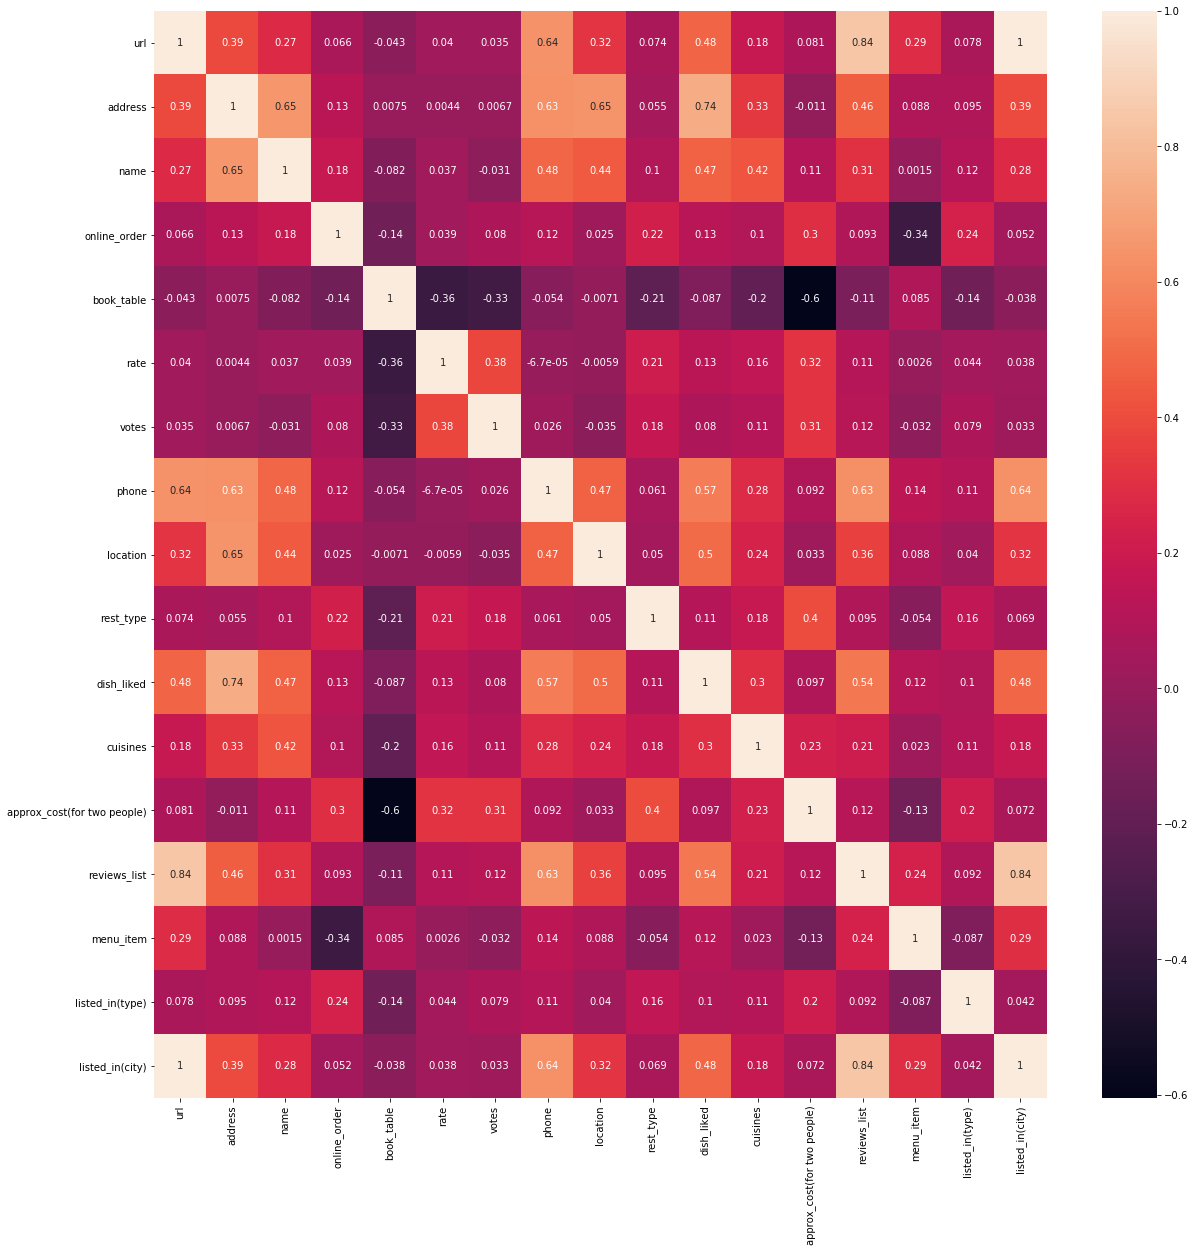

In [32]:
corr = data.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr , annot = True)
plt.show()

#### Votes is hight correlated with rates

In [35]:
# Splitting the dataset

from sklearn.model_selection import train_test_split

# Defining dependent and independent variables

x = data.drop(["rate"], axis=1)
y = data['rate']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 42)
x_train.head()

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
49237,22122,934,835,0,1,61,6504,18,2,950,112,250,13328,0,2,28
1000,450,320,198,0,0,1428,379,10,0,316,211,800,370,138,2,1
32826,14538,2061,1712,0,1,44,4578,44,2,2106,957,550,8760,2833,2,18
5047,2066,1042,930,1,1,2635,1204,28,4,1070,9,600,1456,0,1,4
32775,14518,2257,1883,0,1,76,2572,13,2,2307,208,600,8750,3154,2,18


In [36]:
y_train.head()

49237    3.4
1000     4.2
32826    3.9
5047     4.3
32775    3.5
Name: rate, dtype: float64

## Training the Model Using Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

# Defining the model
lr = LinearRegression()

# Feeding the model
lr.fit(x_train, y_train)

# Prediction
y_pred = lr.predict(x_test)

y_pred

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

array([4.11448818, 4.42936765, 4.28697062, ..., 3.74143485, 4.02391346,
       3.82497693])

In [40]:
# Score Calculation

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.2427784324780904

### With the above implementation it was possible to deliver useful information for Business areas and also for Zomato customers on choosing the best restaurant for ordering (specially the new ones)